## <a target="_blank" href="">AI hub 한국인 안면 이미지 데이터셋 </a> 전처리

<p> 큰 task 두가지는 표정 분류와 realtime 표정 인식. 결국, 두가지 모두 학습의 정확도가 가장 중요.<br>지난주까지 task : 학습 방법론 논문 탐색, 이미지 데이터셋 확보, 교내 gpu 대여 및 사용해보기</p>

In [3]:
!pip install imutils

In [7]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import os
from matplotlib import pyplot as plt
# from google.colab import drive
# from google.colab.patches import cv2_imshow
# drive.mount('/content/drive')

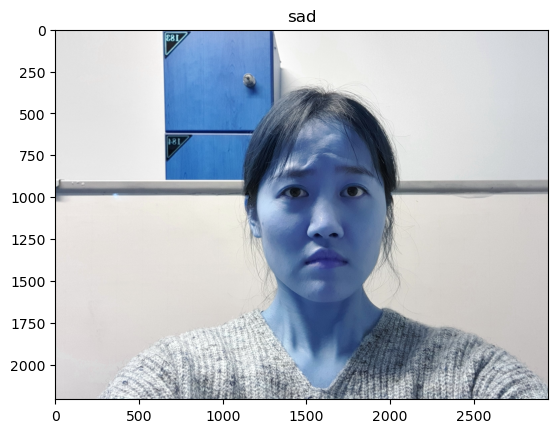

In [36]:
sad = cv2.imread('data/sad.jpg')
# sad = cv2.cvtColor(sad, cv2.COLOR_BGR2GRAY)

plt.imshow(sad)
plt.title('sad')
plt.show()

### 1. haar cascade 이용하여 얼굴만 추출

In [37]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(sad, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

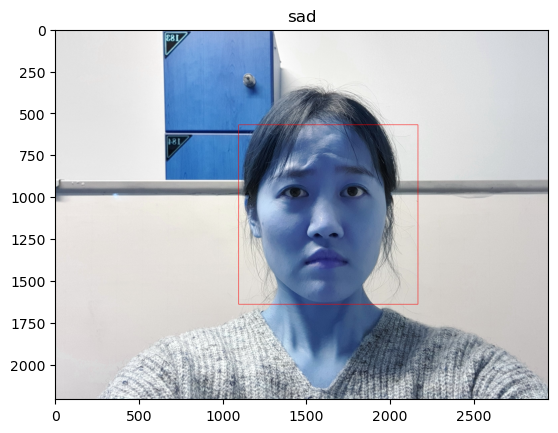

In [39]:
for (x,y,w,h) in faces:
    cv2.rectangle(sad, (x,y), (x+w,y+h), (255,0,0), 2)
    plt.imshow(sad)
    plt.title('sad')
    plt.show()

In [44]:
# face cutting 함수
def cutting_face(image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(sad, (x,y), (x+w,y+h), (255,0,0), 2)
        cropped = image[y: y+h, x: x+h]
        resize = cv2.resize(cropped, (180,180)) #resizing
    return resize

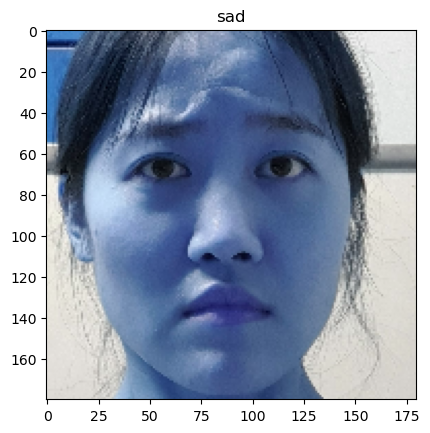

In [47]:
cutted_face = cutting_face(sad)
plt.imshow(cutted_face)
plt.title('sad')
plt.show()

In [48]:
type(cutted_face)

numpy.ndarray

### 2. 이미지 다운샘플링

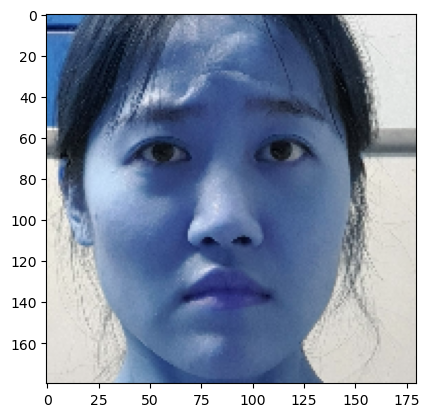

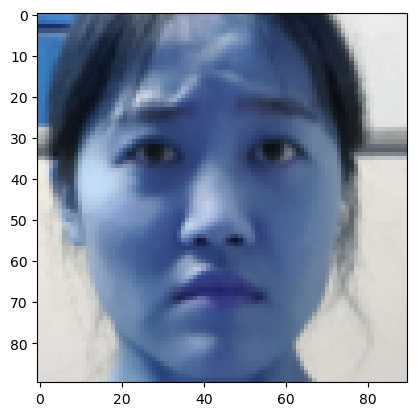

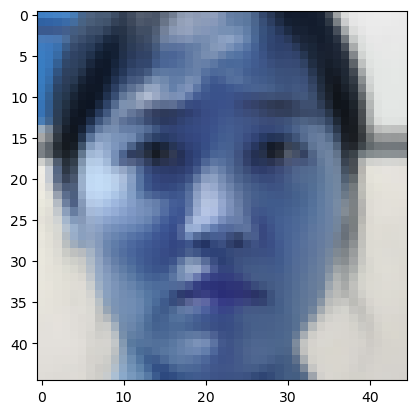

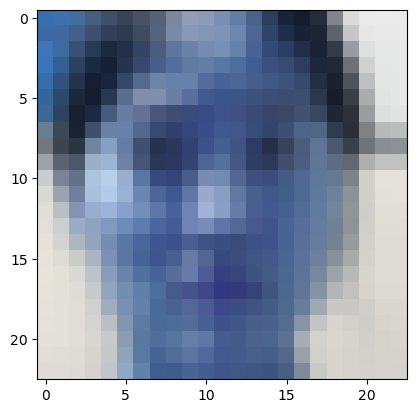

In [51]:
def pyramid(img):
    g_down = []
    g_down.append(img)

    for i in range(3):
        tmp = cv2.pyrDown(img)
        g_down.append(tmp)
        img = tmp

    for i in range(4):
        plt.imshow(g_down[i])
        plt.show()

    cv2.waitKey(0)
    cv2.destroyAllWindows()

pyramid(cutted_face)

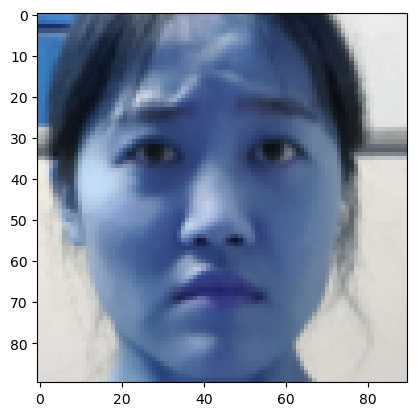

In [58]:
def downsampling1(img):
    g_down = []
    g_down.append(img)

    for i in range(3):
        tmp = cv2.pyrDown(img)
        g_down.append(tmp)
        img = tmp

#     for i in range(4):
#       cv2_imshow(g_down[i])

    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return g_down[1]

downsample_face = downsampling1(cutted_face)
plt.imshow(downsample_face)
plt.show()

cutted face, downsample_face 두 개 비교해보기

### 3. 이미지 grayscale로 변경 (표정은 칼러 불필요)

In [63]:
face_gray1 = cv2.cvtColor(downsample_face, cv2.COLOR_BGR2GRAY)

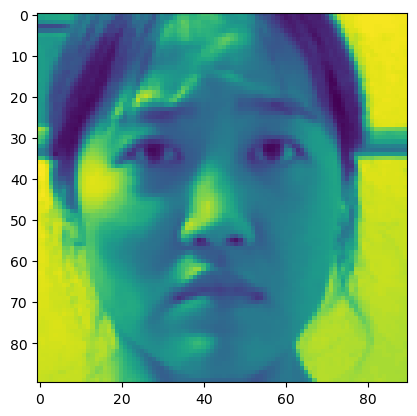

In [64]:
plt.imshow(face_gray1)
plt.show()

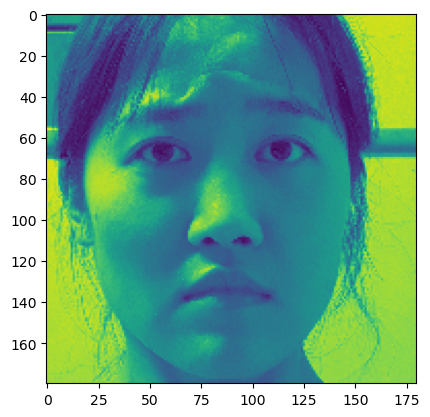

In [65]:
face_gray2 = cv2.cvtColor(cutted_face, cv2.COLOR_BGR2GRAY)
plt.imshow(face_gray2)
plt.show()

### 4. dlib 활용 얼굴 랜드마크 검출

In [81]:
def show_raw_detection(image, detector, predictor):
    rects = detector(image, 1)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        (x,y,w,h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(image, (x,y), (x+w,y+h),(0,255,0),2)

        cv2.putText(image, "Face #{}".format(i+1), (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

        for (x,y) in shape:
            cv2.circle(image, (x,y), 1, (0,0,255), -1)
    
    plt.imshow(image)
    plt.show()

In [82]:
def draw_individual_detections(image, detector, predictor):
    rects = detector(image, 1)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        for (name, (i,j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
            clone = image.copy()
            cv2.putText(clone, name, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)

            for (x,y) in shape[i:j]:
                cv2.circle(clone, (x,y), 1, (0,0,255), -1)

            (x,y,w,h) = cv2.boundingRect(np.array([shape[i:j]]))
            roi = image[y:y + h, x:x+w]
            roi = imutils.resize(roi, width = 250, inter = cv2.INTER_CUBIC)

            plt.imshow(roi)
            plt.imshow(clone)

        output = face_utils.visualize_facial_landmarks(image, shape)
        plt.imshow(output)
        plt.show()

#### 필요 파일 설치

In [30]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK

--2023-04-21 19:41:26--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: 'shape_predictor_68_face_landmarks.dat.bz2'

     0K .......... .......... .......... .......... ..........  0% 1.98M 31s
    50K .......... .......... .......... .......... ..........  0%  275K 2m9s
   100K .......... .......... .......... .......... ..........  0%  254K 2m48s
   150K .......... .......... .......... .......... ..........  0% 7.18M 2m8s
   200K .......... .......... .......... .......... ..........  0%  240K 2m34s
   250K .......... .......... .......... .......... ..........  0% 6.80M 2m10s
   300K .......... .......... .......... .......... ..........  0%  243K 2m28s
   350K .......... .......... .......... .......... ..........  0%  258K 2m39s
   400K .......... .......... .......... ...

In [88]:
datFile = "shape_predictor_68_face_landmarks.dat"

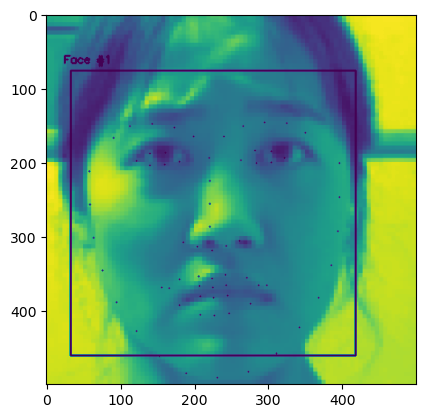

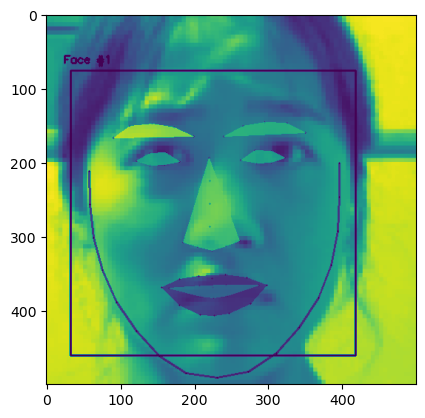

In [89]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(datFile)
image = imutils.resize(face_gray1, width=500)
show_raw_detection(image, detector, predictor)
draw_individual_detections(image, detector, predictor)

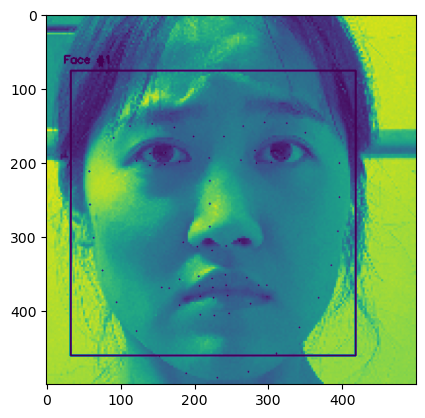

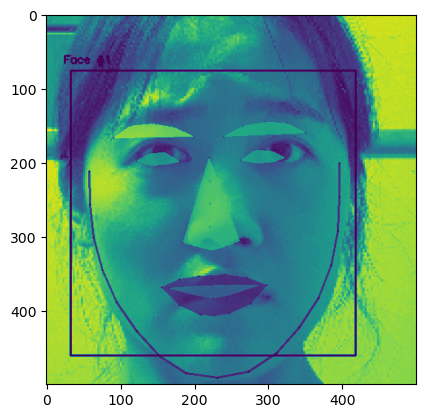

In [87]:
image = imutils.resize(face_gray2, width=500)
show_raw_detection(image, detector, predictor)
draw_individual_detections(image, detector, predictor)